In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU, Bidirectional
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import GaussianNoise
from keras import layers
from keras import regularizers
from sklearn import preprocessing
print(tf.__version__)
import pickle

2023-12-08 15:16:32.580874: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-08 15:16:32.581060: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-08 15:16:32.590285: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-08 15:16:32.637734: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 15:16:33.555079: W tensorflow/compiler/tf2

2.15.0


In [2]:
subjectList = pd.read_csv('participantID1.csv', header=None) # import the number participant IDs without the header
numSubjects = subjectList.count()[0]

subjectAlias = np.linspace(1,numSubjects,numSubjects).tolist()
outerSubjectAlias = subjectAlias
trialNames = ['NN','YN','NY','YY'] # NN = NNL + NNH, YN = YNL + YNH, NY = NYL + NHH, YY = YYL + YYH

In [3]:
outerSubjectAlias

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0]

In [4]:
# Parameter set 5
dropOutRates = 0.3
firstLSTMNodes = 128
secondLSTMNodes = 64
numDenseLayers = 2
miniBatch = 64
numEpochs = 100
featureCombo = [['speed','thetaDot']]
#featureCombo = [['speed','thetaDot','cumulativeSum','height']]

In [5]:
with open('trajectoryDataFrame_win10_multilabel.pkl', 'rb') as file:
    # Call load method to deserialze
    trajectoryDataFrame = pickle.load(file)
with open('outputDataFrame_win10_multilabel.pkl', 'rb') as file:
    # Call load method to deserialze
    outputDataFrame = pickle.load(file)

In [9]:
trajectoryDataFrame[0].shape

(4367, 11)

In [6]:
trajectoryDataFrame[0].shape

(4367, 11)

In [649]:
def assignUserOutput(dataFrameData, requiredSubjects):
    requiredData = dataFrameData.loc[requiredSubjects].to_numpy()
    return requiredData

def assignUserTraj(dataFrameData, requiredSubjects, featureCombo, requiredFeatureCombo):
    requiredData = np.array([])
    for i in range(len(trajectoryDataFrame)):
        temp = dataFrameData[i].loc[requiredSubjects,featureCombo[requiredFeatureCombo]].to_numpy()
        temp = temp.reshape(temp.shape[0],1,temp.shape[1])
        if i == 0:
            requiredData = temp
        if i != 0 :
            requiredData = np.append(requiredData,temp, axis=1)
    return requiredData

# def lstmModel(dropoutRate, LSTM1, LSTM2, numDenseLayers, features, seq_length, numClasses):
#     init_learning_rate = 0.001
#     model = Sequential()
#     model.add(LSTM(LSTM1,input_shape=(seq_length,features),return_sequences=True)) # True = many to many
#     model.add(LSTM(LSTM2,input_shape=(seq_length,features),return_sequences=False)) # To use fast cuda cores, use tanh activation functions
#     for i in range(numDenseLayers) :
#         model.add(Dropout(dropoutRate))
#         model.add(Dense(16, activation='LeakyReLU'))
#     model.add(Dense(numClasses,kernel_initializer='normal',activation='sigmoid'))
#     #optimizer = tf.keras.optimizers.Adam(learning_rate=init_learning_rate, weight_decay=decay_rate)
#     optimizer = tf.keras.optimizers.Adam(learning_rate=init_learning_rate)
#     #model.compile(loss='categorical_crossentropy',optimizer =optimizer,metrics=['accuracy'])
#     #model.compile(loss='binary_crossentropy',optimizer =optimizer,metrics=['accuracy'])  
#     model.compile(loss='binary_crossentropy',optimizer =optimizer,metrics=['accuracy'])
#     return model

def lstmModel(dropoutRate, LSTM1, LSTM2, numDenseLayers, features, seq_length, numClasses):
    init_learning_rate = 0.1
    model = Sequential()
    #model.add(GaussianNoise(1,input_shape=(seq_length,features)))
    model.add(LSTM(512,input_shape=(seq_length,features),return_sequences=False)) # True = many to many
    #model.add(LSTM(256,input_shape=(seq_length,features),return_sequences=True)) # True = many to many
    #model.add(LSTM(128,input_shape=(seq_length,features),return_sequences=True)) # True = many to many
    #model.add(LSTM(64,input_shape=(seq_length,features),return_sequences=False)) # True = many to many
    #model.add(LSTM(LSTM1,input_shape=(seq_length,features),return_sequences=False)) # True = many to many
    # model.add(Dropout(0.25))
    # model.add(Dense(16, activation='gelu'))
    # model.add(Dropout(0.25))
    # model.add(Dense(16, activation='tanh'))
    # model.add(Dropout(0.25))
    # model.add(Dense(16, activation='LeakyReLU'))
    # model.add(Dropout(0.25))
    # model.add(Dense(16, activation='tanh'))
    # model.add(Dropout(0.25))   
    #model.add(Dense(64, activation='tanh'))
    model.add(Dense(numClasses,kernel_initializer='normal',activation='sigmoid'))
    #optimizer = tf.keras.optimizers.Adam(learning_rate=init_learning_rate, weight_decay=decay_rate)
    optimizer = tf.keras.optimizers.Adam(learning_rate=init_learning_rate)
    #model.compile(loss='categorical_crossentropy',optimizer =optimizer,metrics=['accuracy'])
    #model.compile(loss='binary_crossentropy',optimizer =optimizer,metrics=['accuracy'])  
    model.summary()
    model.compile(loss='BinaryCrossentropy',optimizer =optimizer,metrics=['accuracy'])
    return model

In [650]:
# init_learning_rate = 0.001 # initial learning rate
# decay_rate = 0.2
# momentum = 0.2


# model = Sequential()
# #model.add(LSTM(8,input_shape=(seq_length,features),return_sequences=False)) #True = many to many
# model.add(LSTM(128,input_shape=(seq_length,features),return_sequences=True)) # To use fast cuda cores, use tanh activation functions
# model.add(LSTM(64, activation='tanh',return_sequences=False)) # To use fast cuda cores, use tanh activation functions
# model.add(Dropout(0.2))
# model.add(Dense(16, activation='LeakyReLU'))
# model.add(Dropout(0.2))
# model.add(Dense(16, activation='tanh'))
# model.add(Dropout(0.2))
# model.add(Dense(16, activation='LeakyReLU'))
# model.add(Dropout(0.2))
# model.add(Dense(16, activation='tanh'))
# model.add(Dropout(0.2))
# model.add(Dense(len(trialNum),kernel_initializer='normal',activation='sigmoid'))
# optimizer = tf.keras.optimizers.Adam(learning_rate=init_learning_rate, weight_decay=decay_rate)
# model.compile(loss='categorical_crossentropy',optimizer =optimizer,metrics=['accuracy']) 
# model.summary()

In [651]:
trainFraction = 0.7

numTrainData = int(trainFraction*len(outerSubjectAlias))
numTestData = len(outerSubjectAlias) - numTrainData
trainSubjects = outerSubjectAlias[0:numTrainData]
testSubjects = outerSubjectAlias[len(trainSubjects):len(outerSubjectAlias)]



trainTrajData = assignUserTraj(trajectoryDataFrame,trainSubjects, featureCombo, 0)
trainOutputData = assignUserOutput(outputDataFrame,trainSubjects)

testTrajData = assignUserTraj(trajectoryDataFrame,testSubjects, featureCombo, 0)
testOutputData = assignUserOutput(outputDataFrame,testSubjects)

features = trainTrajData.shape[2]
seq_length = trainTrajData.shape[1]
numClasses = trainOutputData.shape[1]

In [652]:
trainTrajData.shape

(3017, 240, 2)

In [653]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

# trajectoryScaled = trainTrajData
# scaler1 = MinMaxScaler()
# scaler2 = MinMaxScaler()
# scaler3 = MinMaxScaler()
# for i in range(int(trainTrajData.shape[0])):
#     scaler1.fit(trainTrajData[i,:,0].reshape(-1,1))
#     scaler2.fit(trainTrajData[i,:,1].reshape(-1,1))
#     scaler3.fit(trainTrajData[i,:,2].reshape(-1,1))
#     trajectoryScaled[i,:,0] = scaler1.transform(trainTrajData[i,:,0].reshape(-1,1)).reshape(-1,)
#     trajectoryScaled[i,:,1] = scaler2.transform(trainTrajData[i,:,1].reshape(-1,1)).reshape(-1,)
#     trajectoryScaled[i,:,2] = scaler3.transform(trainTrajData[i,:,2].reshape(-1,1)).reshape(-1,)
# trainTrajData = trajectoryScaled

In [654]:
trainTrajData

array([[[0.00000000e+00, 4.40009983e-13],
        [0.00000000e+00, 8.00000000e-13],
        [0.00000000e+00, 7.19923719e-13],
        ...,
        [4.26627993e-01, 8.00000000e-05],
        [3.86521852e-01, 8.00000000e-05],
        [3.19545677e-01, 7.97728386e-05]],

       [[2.93321191e-01, 1.33359990e-07],
        [2.93626755e-01, 6.68133627e-05],
        [3.60109994e-01, 8.00000000e-05],
        ...,
        [4.75164403e+00, 7.82359941e+00],
        [4.56931832e+00, 1.13228039e+01],
        [5.00286763e+00, 1.48235202e+01]],

       [[1.99444632e+00, 8.85040160e+00],
        [2.15445323e+00, 1.02286243e+01],
        [2.91581673e+00, 1.53745409e+01],
        ...,
        [3.66424229e+01, 2.33545089e-02],
        [4.29449297e+01, 2.04719353e-02],
        [4.71318711e+01, 1.96365755e-02]],

       ...,

       [[2.81088462e-01, 1.77918558e+01],
        [1.85839465e-01, 1.63763713e+01],
        [2.76290184e-01, 1.81228050e+01],
        ...,
        [5.27758255e+01, 9.95450483e-03],
     

In [655]:
# trajectoryScaled = testTrajData
# scaler1 = MinMaxScaler()
# scaler2 = MinMaxScaler()
# scaler3 = MinMaxScaler()
# for i in range(int(testTrajData.shape[0])):
#     scaler1.fit(testTrajData[i,:,0].reshape(-1,1))
#     scaler2.fit(testTrajData[i,:,1].reshape(-1,1))
#     scaler3.fit(testTrajData[i,:,2].reshape(-1,1))
#     trajectoryScaled[i,:,0] = scaler1.transform(testTrajData[i,:,0].reshape(-1,1)).reshape(-1,)
#     trajectoryScaled[i,:,1] = scaler2.transform(testTrajData[i,:,1].reshape(-1,1)).reshape(-1,)
#     trajectoryScaled[i,:,2] = scaler3.transform(testTrajData[i,:,2].reshape(-1,1)).reshape(-1,)
# testTrajData = trajectoryScaled

In [656]:
mlModel = lstmModel(dropOutRates, firstLSTMNodes, secondLSTMNodes, numDenseLayers, features, seq_length, numClasses)
history = mlModel.fit(trainTrajData,trainOutputData,epochs=400,batch_size=128,validation_data=(testTrajData, testOutputData),verbose=1)

Epoch 1/400
24/24 [==============================] - 4s 84ms/step - loss: 1.5092 - accuracy: 0.4839 - val_loss: 0.7850 - val_accuracy: 0.3141
Epoch 2/400
24/24 [==============================] - 2s 67ms/step - loss: 0.7845 - accuracy: 0.4647 - val_loss: 0.7048 - val_accuracy: 0.5400
Epoch 3/400
24/24 [==============================] - 2s 66ms/step - loss: 0.7217 - accuracy: 0.4355 - val_loss: 0.7949 - val_accuracy: 0.7007
Epoch 4/400
24/24 [==============================] - 2s 68ms/step - loss: 0.8380 - accuracy: 0.4660 - val_loss: 0.9341 - val_accuracy: 0.2970
Epoch 5/400
24/24 [==============================] - 2s 68ms/step - loss: 0.7870 - accuracy: 0.4342 - val_loss: 0.8628 - val_accuracy: 0.7015
Epoch 6/400
24/24 [==============================] - 2s 69ms/step - loss: 0.7608 - accuracy: 0.4551 - val_loss: 0.7359 - val_accuracy: 0.2970
Epoch 7/400
24/24 [==============================] - 2s 69ms/step - loss: 0.7583 - accuracy: 0.4395 - val_loss: 0.7071 - val_accuracy: 0.2970
Epoch 

In [657]:
#Predict
y_prediction = mlModel.predict(testTrajData)
y_test = testOutputData

43/43 [==============================] - 1s 15ms/step


In [658]:
y_prediction

array([[0.34835747, 0.4890882 ],
       [0.34172606, 0.5162737 ],
       [0.24828519, 0.5025021 ],
       ...,
       [0.34172657, 0.5162739 ],
       [0.24828565, 0.5025024 ],
       [0.24828565, 0.5025024 ]], dtype=float32)

In [659]:
y_test

array([[1.0000e-05, 1.0000e-05],
       [1.0000e-05, 1.0000e-05],
       [1.0000e-05, 1.0000e-05],
       ...,
       [9.9999e-01, 9.9999e-01],
       [9.9999e-01, 9.9999e-01],
       [9.9999e-01, 9.9999e-01]])

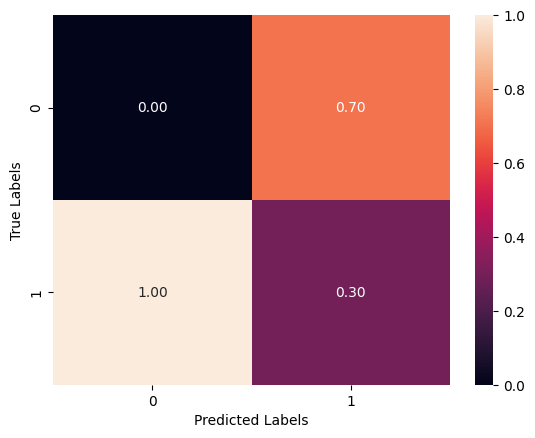

In [660]:
y_prediction=np.argmax(y_prediction, axis=-1)
y_test=np.argmax(y_test, axis=-1)
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, y_prediction,normalize='pred')
ax = sns.heatmap(result, annot=True, fmt=".2f")
#ax.set_xticklabels(trialNames)
#ax.set_yticklabels(trialNames)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [661]:
result

array([[0.        , 0.70400593],
       [1.        , 0.29599407]])

In [662]:
classes = [1,2]
y_prediction = mlModel.predict(testTrajData)
positiveThresholdClass1 = 0.51
y_test = testOutputData
## class1 True values
class1TP = 0
class1TN = 0
class1FP = 0
class1FN = 0
class1P = 0
class1N = 0
for i in range(y_test.shape[0]):
        if(y_prediction[i,0] < positiveThresholdClass1 and y_test[i,0] == 1e-5 ):
            class1TN = class1TN + 1

        if(y_prediction[i,0] < positiveThresholdClass1 and y_test[i,0] == 1-1e-5 ):
            class1FN = class1FN + 1

        if(y_prediction[i,0] >= positiveThresholdClass1 and y_test[i,0] == 1e-5 ):
            class1FP = class1FP + 1

        if(y_prediction[i,0] >= positiveThresholdClass1 and y_test[i,0] == 1-1e-5):
            class1TP = class1TP + 1
        

        
        if( y_test[i,0] ==  1e-5):
             class1N = class1N + 1
        if( y_test[i,0] == 1 -  1e-5):
             class1P = class1P + 1

## class 2 True values
class2TP = 0
class2TN = 0
class2FP = 0
class2FN = 0
class2P = 0
class2N = 0
positiveThresholdClass2 = 0.51
for i in range(y_test.shape[0]):
        if(y_prediction[i,1]  < positiveThresholdClass2 and y_test[i,1] == 1e-5 ):
            class2TN = class2TN + 1

        if(y_prediction[i,1] < positiveThresholdClass2 and y_test[i,1] == 1-1e-5 ):
            class2FN = class2FN + 1

        if(y_prediction[i,1] >= positiveThresholdClass2 and y_test[i,1] == 1e-5 ):
            class2FP = class2FP + 1
        


        if(y_prediction[i,1] >= positiveThresholdClass2 and y_test[i,1] == 1-1e-5):
            class2TP = class2TP + 1

        if( y_test[i,1] ==  1e-5):
            class2P = class2P + 1
        if( y_test[i,1] == 1 -  1e-5):
            class2N = class2N + 1

            
totalClass1 = class1TP + class1FP + class1FN + class1TN
class1Matrix = np.array([[class1TP, class1FP],[class1FN,class1TN]])
class1Matrix = np.divide(class1Matrix, totalClass1)

totalClass2 = class2TP + class2FP + class2FN + class2TN
class2Matrix = np.array([[class2TP, class2FP],[class2FN,class2TN]])
class2Matrix = np.divide(class2Matrix, totalClass2)

distributionMatrix = np.array([[class1P, class2P],[class1N,class2N]])


 1/43 [..............................] - ETA: 0s

43/43 [==============================] - 1s 12ms/step


In [663]:
class1Matrix = np.array([[class1TP, class1FP],[class1FN,class1TN]])
class1Matrix = np.divide(class1Matrix, totalClass1)

totalClass2 = class2TP + class2FP + class2FN + class2TN
class2Matrix = np.array([[class2TP, class2FP],[class2FN,class2TN]])
class2Matrix = np.divide(class2Matrix, totalClass2)


In [664]:
distributionMatrix

array([[532, 671],
       [818, 679]])

In [665]:
class2Matrix

array([[0.11111111, 0.09703704],
       [0.39185185, 0.4       ]])

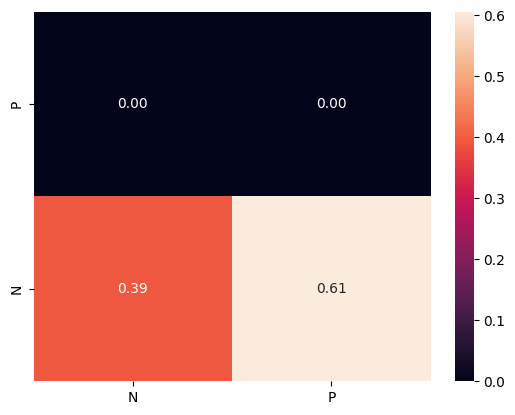

In [666]:
ax = sns.heatmap(class1Matrix, annot=True, fmt=".2f")
ax.set_xticklabels(["N", "P"])
ax.set_yticklabels(["P", "N"])
plt.show()

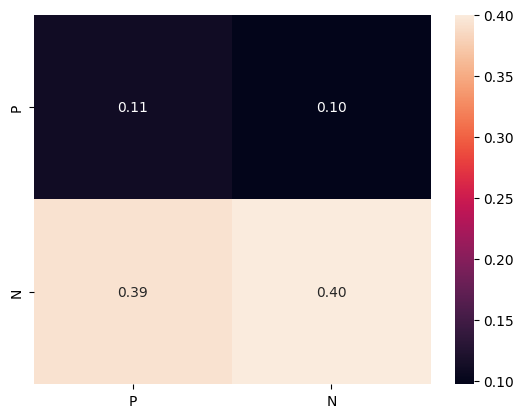

In [667]:
ax = sns.heatmap(class2Matrix, annot=True, fmt=".2f")
ax.set_xticklabels(["P", "N"])
ax.set_yticklabels(["P", "N"])
plt.show()

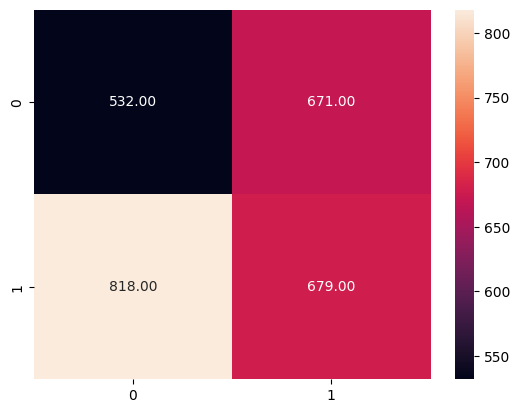

In [668]:
ax = sns.heatmap(distributionMatrix, annot=True, fmt=".2f")

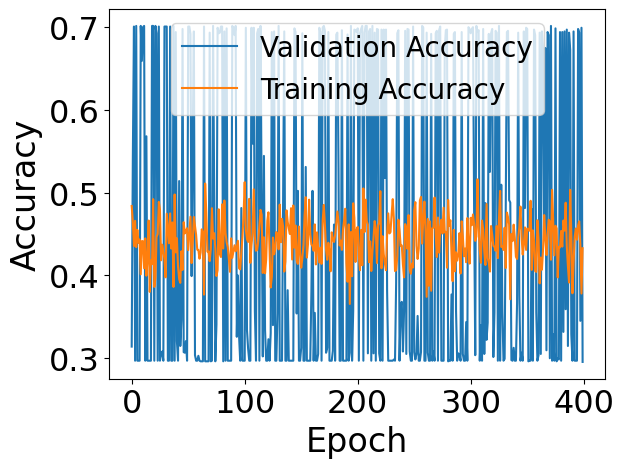

In [669]:
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Accuracy', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=23)
plt.legend(fontsize=20)

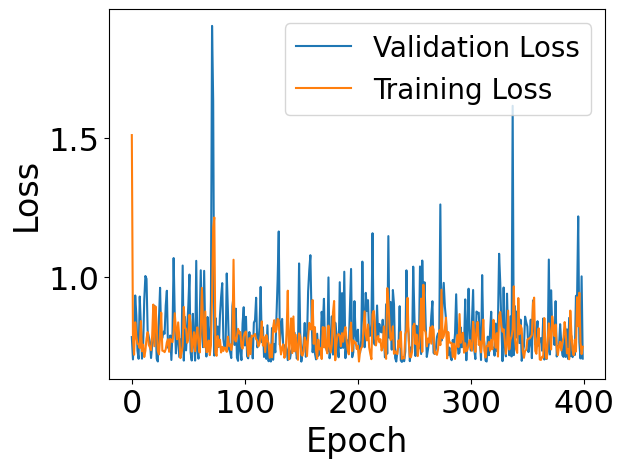

In [670]:
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Loss', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=23)
plt.legend(fontsize=20)

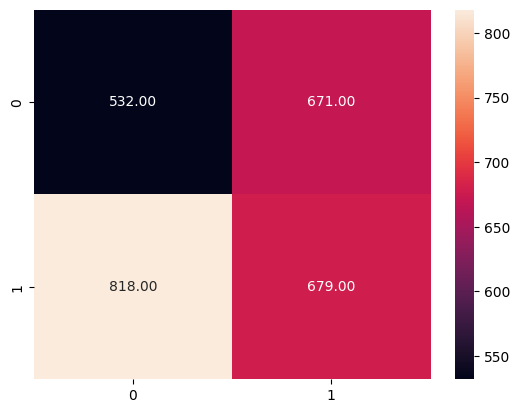

In [671]:
ax = sns.heatmap(distributionMatrix, annot=True, fmt=".2f")

In [672]:

## class1 True values
class1P = 0
class1N = 0
for i in range(trainOutputData.shape[0]):      
    if( trainOutputData[i,0] == 0):
            class1N = class1N + 1
    if( trainOutputData[i,0] == 1):
            class1P = class1P + 1

## class 2 True values
class2P = 0
class2N = 0
for i in range(trainOutputData.shape[0]):
    if( trainOutputData[i,1] == 0):
        class2P = class2P + 1
    if( trainOutputData[i,1] == 1):
        class2N = class2N + 1

distributionMatrix = np.array([[class1P, class2P],[class1N,class2N]])


In [673]:
distributionMatrix

array([[0, 0],
       [0, 0]])